## 60 years of weather data for Izmir

In [1]:
# Importing packages
import requests
import pandas as pd
import json
import matplotlib.pyplot as plt

from matplotlib.backends.backend_agg import FigureCanvasAgg
from matplotlib.figure import Figure

pd.options.mode.chained_assignment = None  # default='warn'

Data was provided from Open-Meteo API. Link for Open-Meteo : <a href="https://open-meteo.com/">Weather data by Open-Meteo.com</a>

In [2]:
# Base_url for Open-Meteo historical weather API
base_url = "https://archive-api.open-meteo.com/v1/era5"

In [3]:
# Url to get daily values for Izmir between 1962-11-18 and 2022-11-18 in Europe/Moscow timezone 
# Default(Celsius) unit for temperature, m/s unit for windspeed and default(mm) unit for precipitation.
latitude = '38.41'
longitude = '27.14'
start_date = '1962-11-18'
end_date = '2022-11-18'
daily  = 'temperature_2m_max,temperature_2m_min,apparent_temperature_max,apparent_temperature_min,precipitation_sum,\
rain_sum,snowfall_sum,windspeed_10m_max,windgusts_10m_max'
timezone = 'Europe%2FMoscow'
windspeed_unit = 'ms'

url = base_url + '?latitude=' + latitude + '&longitude=' + longitude + '&start_date=' + start_date +  \
'&end_date=' + end_date + '&daily=' + daily + '&timezone=' + timezone + '&windspeed_unit=' + windspeed_unit

In [4]:
url

'https://archive-api.open-meteo.com/v1/era5?latitude=38.41&longitude=27.14&start_date=1962-11-18&end_date=2022-11-18&daily=temperature_2m_max,temperature_2m_min,apparent_temperature_max,apparent_temperature_min,precipitation_sum,rain_sum,snowfall_sum,windspeed_10m_max,windgusts_10m_max&timezone=Europe%2FMoscow&windspeed_unit=ms'

In [5]:
# Get request and the status code of the response from the server
r = requests.get(url)
r.status_code

200

In [6]:
# Convert the response to JSON format
data = r.json()
data

{'latitude': 38.75,
 'longitude': 27.0,
 'generationtime_ms': 149.82903003692627,
 'utc_offset_seconds': 10800,
 'timezone': 'Europe/Moscow',
 'timezone_abbreviation': 'MSK',
 'elevation': 172.0,
 'daily_units': {'time': 'iso8601',
  'temperature_2m_max': '°C',
  'temperature_2m_min': '°C',
  'apparent_temperature_max': '°C',
  'apparent_temperature_min': '°C',
  'precipitation_sum': 'mm',
  'rain_sum': 'mm',
  'snowfall_sum': 'cm',
  'windspeed_10m_max': 'm/s',
  'windgusts_10m_max': 'm/s'},
 'daily': {'time': ['1962-11-18',
   '1962-11-19',
   '1962-11-20',
   '1962-11-21',
   '1962-11-22',
   '1962-11-23',
   '1962-11-24',
   '1962-11-25',
   '1962-11-26',
   '1962-11-27',
   '1962-11-28',
   '1962-11-29',
   '1962-11-30',
   '1962-12-01',
   '1962-12-02',
   '1962-12-03',
   '1962-12-04',
   '1962-12-05',
   '1962-12-06',
   '1962-12-07',
   '1962-12-08',
   '1962-12-09',
   '1962-12-10',
   '1962-12-11',
   '1962-12-12',
   '1962-12-13',
   '1962-12-14',
   '1962-12-15',
   '1962-

In [7]:
# Creating dataframe
df = pd.DataFrame()

In [8]:
data['daily'].keys()

dict_keys(['time', 'temperature_2m_max', 'temperature_2m_min', 'apparent_temperature_max', 'apparent_temperature_min', 'precipitation_sum', 'rain_sum', 'snowfall_sum', 'windspeed_10m_max', 'windgusts_10m_max'])

In [9]:
# Adding values to dataframe
df['date'] = data['daily']['time']
df['temperature_2m_max'] = data['daily']['temperature_2m_max']
df['temperature_2m_min'] = data['daily']['temperature_2m_min']
df['apparent_temperature_max'] = data['daily']['apparent_temperature_max']
df['apparent_temperature_min'] = data['daily']['apparent_temperature_min']
df['precipitation_sum'] = data['daily']['precipitation_sum']
df['rain_sum'] = data['daily']['rain_sum']
df['snowfall_sum'] = data['daily']['snowfall_sum']
df['windspeed_10m_max'] = data['daily']['windspeed_10m_max']
df['windgusts_10m_max'] = data['daily']['windgusts_10m_max']

In [10]:
df.head()

,date,temperature_2m_max,temperature_2m_min,apparent_temperature_max,apparent_temperature_min,precipitation_sum,rain_sum,snowfall_sum,windspeed_10m_max,windgusts_10m_max
0,1962-11-18,17.9,14.4,17.1,13.2,12.5,12.5,0.0,4.72,13.1
1,1962-11-19,19.1,13.6,17.7,12.8,0.2,0.2,0.0,2.78,6.9
2,1962-11-20,20.3,12.4,18.7,10.5,0.0,0.0,0.0,4.43,8.8
3,1962-11-21,17.9,15.7,16.5,14.8,49.6,49.6,0.0,5.24,16.7
4,1962-11-22,17.3,11.1,16.9,9.4,0.0,0.0,0.0,4.81,10.3


In [11]:
df.dtypes

date                         object
temperature_2m_max          float64
temperature_2m_min          float64
apparent_temperature_max    float64
apparent_temperature_min    float64
precipitation_sum           float64
rain_sum                    float64
snowfall_sum                float64
windspeed_10m_max           float64
windgusts_10m_max           float64
dtype: object

In [12]:
# Change 'date' to timestamp format
df['date'] = df['date'].apply(lambda x: pd.Timestamp(x))

In [13]:
# Create 'year', 'MM-DD', 'month' and 'day' columns
df['year'] = df['date'].apply(lambda x : pd.Timestamp(x).year)
df['MM-DD'] = df['date'].dt.strftime('%m-%d')
df['month'] = df['date'].apply(lambda x : pd.Timestamp(x).month)
df['day'] = df['date'].apply(lambda x : pd.Timestamp(x).day)

In [14]:
# Drop leap day
df = df[~(df['MM-DD'] == '02-29')]

In [15]:
# Dataframe for values between 1962 and 2012
df_1962_2012 = df.loc[df['date'] < '2013-01-01']

# Dataframe for values between 2012 and 2022
df_2012_2022 = df.loc[df['date'] >= '2013-01-01']

In [16]:
df_1962_2012.describe()

,temperature_2m_max,temperature_2m_min,apparent_temperature_max,apparent_temperature_min,precipitation_sum,rain_sum,snowfall_sum,windspeed_10m_max,windgusts_10m_max,year,month,day
count,18294.000000,18294.000000,18294.000000,18294.000000,18293.000000,18293.000000,18293.000000,18294.000000,18294.000000,18294.000000,18294.000000,18294.000000
mean,20.840467,12.590844,19.930250,10.957363,1.802755,1.789154,0.009785,4.789778,11.214693,1987.438668,6.538483,15.726905
std,8.036044,6.568360,9.855605,8.207360,5.262862,5.242097,0.172833,1.610548,3.733338,14.467922,3.453199,8.796955
min,-0.800000,-6.900000,-7.100000,-12.600000,0.000000,0.000000,0.000000,1.440000,3.600000,1962.000000,1.000000,1.000000
25%,14.300000,7.400000,11.900000,4.600000,0.000000,0.000000,0.000000,3.580000,8.600000,1975.000000,4.000000,8.000000
50%,20.500000,12.700000,19.700000,11.000000,0.000000,0.000000,0.000000,4.600000,10.800000,1987.000000,7.000000,16.000000
75%,28.075000,18.300000,28.800000,18.000000,0.400000,0.400000,0.000000,5.800000,13.300000,2000.000000,10.000000,23.000000
max,38.900000,27.400000,41.500000,29.500000,69.700000,69.700000,9.520000,12.110000,30.400000,2012.000000,12.000000,31.000000


In [17]:
df_2012_2022.describe()

,temperature_2m_max,temperature_2m_min,apparent_temperature_max,apparent_temperature_min,precipitation_sum,rain_sum,snowfall_sum,windspeed_10m_max,windgusts_10m_max,year,month,day
count,3607.000000,3607.000000,3607.000000,3607.000000,3607.000000,3607.000000,3607.000000,3607.000000,3607.000000,3607.000000,3607.000000,3607.000000
mean,21.975686,13.596257,21.098309,12.159385,1.691988,1.677128,0.010674,4.887214,11.506404,2017.446354,6.464098,15.688938
std,7.836690,6.640255,9.634194,8.298103,5.038159,5.011623,0.260585,1.596671,3.720330,2.847159,3.421211,8.793890
min,1.000000,-3.600000,-4.900000,-9.700000,0.000000,0.000000,0.000000,1.280000,3.600000,2013.000000,1.000000,1.000000
25%,15.700000,8.500000,13.500000,5.800000,0.000000,0.000000,0.000000,3.690000,8.800000,2015.000000,4.000000,8.000000
50%,21.900000,13.400000,21.000000,11.900000,0.000000,0.000000,0.000000,4.740000,11.100000,2017.000000,6.000000,16.000000
75%,29.000000,19.600000,30.000000,19.600000,0.300000,0.300000,0.000000,5.910000,13.700000,2020.000000,9.000000,23.000000
max,38.600000,27.000000,39.400000,28.900000,59.400000,59.400000,11.620000,11.690000,30.600000,2022.000000,12.000000,31.000000


The mean daily temperatures between 2012 and 2022 are about 1°C higher than the mean daily temperatures between 1962 and 2012. <br/> The mean daily precipitations between 2012 and 2022 are about 0.1 mm lower than the mean daily precipitations between 1962 and 2012. <br/> The mean daily windspeeds between 2012 and 2022 are about 0.1 m/s higher than the mean daily windspeeds for between 1962 and 2012. The difference in gust values is 0.3 m/s.

In [18]:
# Maximum temperature values for days between 1962 and 2012
df_1962_2012_max_temp = df_1962_2012.groupby(['month', 'day']).agg({'temperature_2m_max':'max'})\
.rename(columns={'temperature_2m_max':'Max data value'})
df_1962_2012_max_temp.reset_index(inplace=True)

# Minimum temperature values for days between 1962 and 2012
df_1962_2012_min_temp = df_1962_2012.groupby(['month', 'day']).agg({'temperature_2m_min':'min'})\
.rename(columns={'temperature_2m_min':'Min data value'})
df_1962_2012_min_temp.reset_index(inplace=True)

# Maximum temperature values for days between 2012 and 2022
df_2012_2022_max_temp = df_2012_2022.groupby(['month', 'day']).agg({'temperature_2m_max':'max'})\
.rename(columns={'temperature_2m_max':'Max data value'})
df_2012_2022_max_temp.reset_index(inplace=True)

# Minimum temperature values for days between 2012 and 2022
df_2012_2022_min_temp = df_2012_2022.groupby(['month', 'day']).agg({'temperature_2m_min':'min'})\
.rename(columns={'temperature_2m_min':'Min data value'})
df_2012_2022_min_temp.reset_index(inplace=True)

In [19]:
# The days maximum daily temperature for 2012-2022 period values are higher than for 1962-2012 period
record_high = df_2012_2022_max_temp[df_2012_2022_max_temp['Max data value'] > df_1962_2012_max_temp['Max data value']]

# The days minimum daily temperature for 2012-2022 period values are lower than for 1962-2012 period
record_low = df_2012_2022_min_temp[df_2012_2022_min_temp['Min data value'] < df_1962_2012_min_temp['Min data value']]

In [20]:
# Values for first plot x-axis ticks 
xticks = ((pd.date_range('2015-01-01','2015-12-31', freq = 'M', inclusive="both")+pd.Timedelta(1, "d"))-pd.DateOffset(months=1)).strftime('%j').astype(int)
xticks 

Int64Index([1, 32, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335], dtype='int64')

In [21]:
# Values for first plot x-axis labels 
xticks_labels = pd.to_datetime(xticks, format = '%j').strftime('%b')
xticks_labels

Index(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct',
       'Nov', 'Dec'],
      dtype='object')

<IPython.core.display.Javascript object>


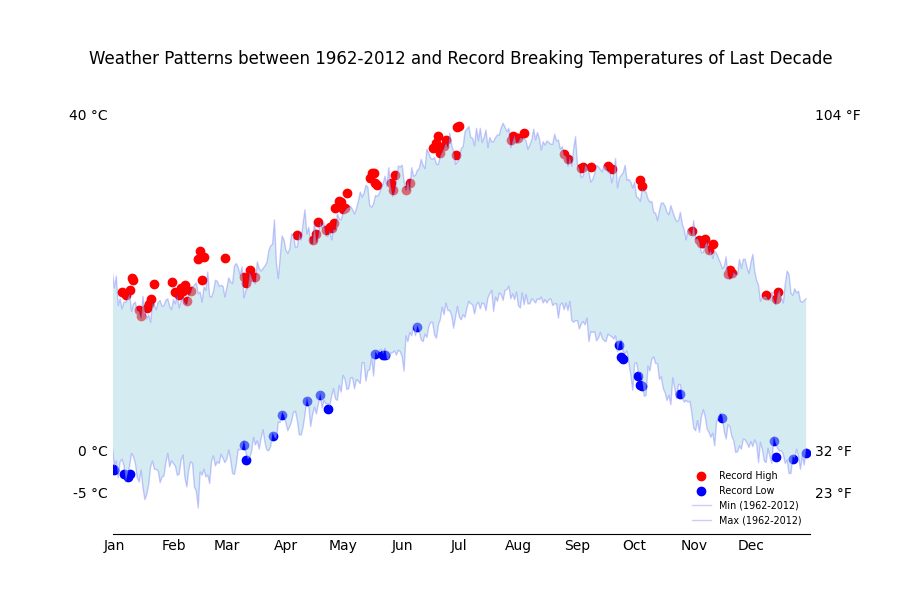

In [22]:
# Plotting the figure
%matplotlib notebook
fig = plt.figure(figsize=(9, 6))

ax1 = plt.gca() # Primary axes
ax2 = ax1.twinx() # Secondary axes

# The scatter plot for record_high and record_low values
plt.scatter(record_high.index, record_high['Max data value'], color = 'r')
plt.scatter(record_low.index, record_low['Min data value'], color = 'b')

# The line graph with fill for df_1962_2012_min_temp and df_1962_2012_max_temp
ax2.plot(df_1962_2012_min_temp['Min data value'], '-', color = 'b', alpha = 0.2, linewidth = 1)
ax2.plot(df_1962_2012_max_temp['Max data value'], '-', color = 'b', alpha = 0.2, linewidth = 1)
ax2.fill_between(range(len(df_1962_2012_max_temp)), df_1962_2012_min_temp['Min data value'], \
                 df_1962_2012_max_temp['Max data value'], facecolor = 'lightblue', alpha = 0.5)

# X-axis labels
ax2.set_xlim(0,366)
ax2.set_xticks(xticks)
ax2.set_xticklabels(xticks_labels)
ax1.set_xticklabels(xticks_labels)

# Title
ax2.set_title('Weather Patterns between 1962-2012 and Record Breaking Temperatures of Last Decade')

# Y-axis labels 
# Celcius values
axlim = ax1.set_ylim(-10,45)
yticks = pd.Series([-5,0,40])
ax1.set_yticks(yticks)
ylabels = pd.Series(yticks).astype(int).astype(str) + ' °C'
ax1.set_yticklabels(ylabels)

# Secondary y-axis labels
# Convert to fahrenheit from celcius
ax2.set_ylim(axlim)
ax2.set_yticks(yticks)
yticks_ax2 = (((yticks) * 9/5) + 32).astype(int)
ylabels_ax2 = pd.Series(yticks_ax2).astype(str) + ' °F'
ax2.set_yticklabels(ylabels_ax2)

# Invisible frame
for spine in ax2.spines:
    ax2.spines[spine].set_visible(False)
for spine in ax1.spines:
    ax1.spines[spine].set_visible(False)

# X-axis bottom frame set visible    
ax1.spines['bottom'].set_visible(True)

# Removing Ticks
ax1.tick_params(axis=u'both', which=u'both',length=0)
ax2.tick_params(axis=u'both', which=u'both',length=0)

# Legend
leg = ax2.legend(labels = ['Record High','Record Low', 'Min (1962-2012)','Max (1962-2012)'], frameon = False, fontsize = 'x-small', loc='lower right')

# Download the figure
canvas = FigureCanvasAgg(fig)
canvas.print_png('First_fig.png')

plt.show()

There are 90 days in which the maximum daily temperatures for 2012-2022 period are higher than the maximum daily temperatures for 1962-2012 period.<br/>
There are 28 days in which the minimum daily temperatures for 2012-2022 period are lower than minimum daily temperatures for 1962-2012 period. 

In [23]:
# Daily mean values for months between 1962 and 2012
df_1962_2012_monthly_mean = df_1962_2012.groupby(['month']).mean()
df_1962_2012_monthly_mean.reset_index(inplace=True)

# Daily mean values for months between 2012 and 2022
df_2012_2022_monthly_mean = df_2012_2022.groupby(['month']).mean()
df_2012_2022_monthly_mean.reset_index(inplace=True)

In [24]:
# Mean daily max wind speeds for months between 1962 and 2012
df_1962_2012_mean_wind = df_1962_2012_monthly_mean[['month','windspeed_10m_max']]
df_1962_2012_mean_wind.rename(columns={'windspeed_10m_max':'Monthly mean'}, inplace=True)

# Mean daily max wind gusts for months between 1962 and 2012
df_1962_2012_mean_gust = df_1962_2012_monthly_mean[['month','windgusts_10m_max']]
df_1962_2012_mean_gust.rename(columns={'windgusts_10m_max':'Monthly mean'}, inplace=True)

# Mean daily max wind speeds for months between 2012 and 2022
df_2012_2022_mean_wind = df_2012_2022_monthly_mean[['month','windspeed_10m_max']]
df_2012_2022_mean_wind.rename(columns={'windspeed_10m_max':'Monthly mean'}, inplace=True)

# Mean daily max wind gusts for months between 2012 and 2022
df_2012_2022_mean_gust = df_2012_2022_monthly_mean[['month','windgusts_10m_max']]
df_2012_2022_mean_gust.rename(columns={'windgusts_10m_max':'Monthly mean'}, inplace=True)

<IPython.core.display.Javascript object>


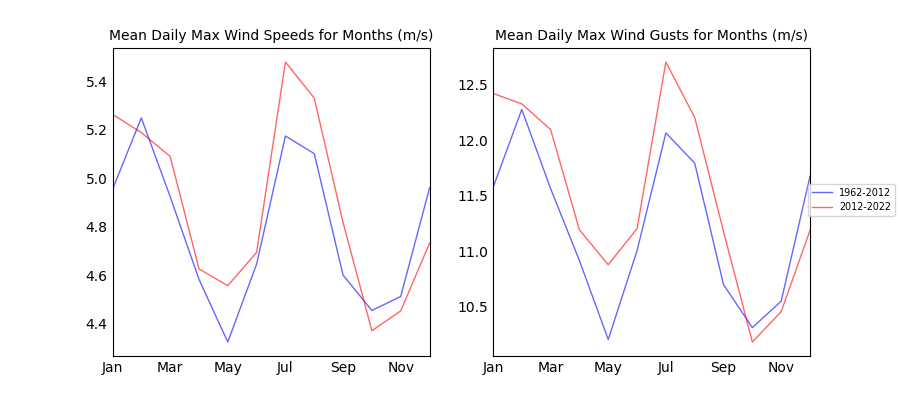

In [25]:
# Plotting the figure
fig, axs = plt.subplots(1, 2, figsize = (9,4))

# Plot1
axs[0].plot(df_1962_2012_mean_wind['Monthly mean'], '-', color = 'b', linewidth = 1, alpha = 0.6)
axs[0].plot(df_2012_2022_mean_wind['Monthly mean'], '-', color = 'r', linewidth = 1, alpha = 0.6)

# Plot1 title
axs[0].set_title('Mean Daily Max Wind Speeds for Months (m/s)', fontsize = 10 )

# X-axis labels for plot1
axs[0].set_xlim(0,11)
xticks1 = pd.Series(range(0,12,2))
axs[0].set_xticks(xticks1)
axs[0].set_xticklabels(['Jan', 'Mar',  'May',  'Jul',  'Sep',  'Nov'])

# Plot2 
axs[1].plot(df_1962_2012_mean_gust['Monthly mean'], '-', color = 'b', linewidth = 1, alpha = 0.6)
axs[1].plot(df_2012_2022_mean_gust['Monthly mean'], '-', color = 'r', linewidth = 1, alpha = 0.6)

# Plot2 title
axs[1].set_title('Mean Daily Max Wind Gusts for Months (m/s)', fontsize = 10)

# X-axis labels for plot2
axs[1].set_xlim(0,11)
axs[1].set_xticks(xticks1)
axs[1].set_xticklabels(['Jan', 'Mar',  'May',  'Jul',  'Sep',  'Nov'])

# Removing ticks
axs[0].tick_params(axis=u'both', which=u'both',length=0)
axs[1].tick_params(axis=u'both', which=u'both',length=0)

# legend
labels = axs[0].get_legend_handles_labels()
fig.legend(labels=['1962-2012','2012-2022'], loc='right',fontsize = 'x-small')

# Download the figure
canvas = FigureCanvasAgg(fig)
canvas.print_png('Second_fig.png')

plt.show()

The wind values for 2012-2022 period are higher between March and October and lower in the rest of the months.<br/> The wind values for 2012-2022 period are significantly higher in May and July.

In [26]:
# Mean daily precipitations for months between 1962 and 2012
df_1962_2012_mean_pcpn = df_1962_2012_monthly_mean[['month','precipitation_sum']]
df_1962_2012_mean_pcpn.rename(columns={'precipitation_sum':'Monthly mean'}, inplace=True)

# Mean daily precipitations for months between 2012 and 2022
df_2012_2022_mean_pcpn = df_2012_2022_monthly_mean[['month','precipitation_sum']]
df_2012_2022_mean_pcpn.rename(columns={'precipitation_sum':'Monthly mean'}, inplace=True)

<IPython.core.display.Javascript object>


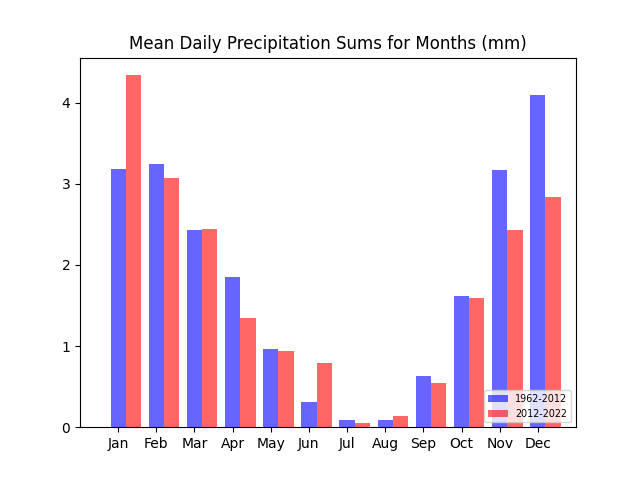

In [27]:
# Plotting the figure
fig = plt.figure()

# Bar values between 1962 and 2012
xvals1 = df_1962_2012_mean_pcpn['month']
yvals1 = df_1962_2012_mean_pcpn['Monthly mean']
plt.bar(xvals1, yvals1, color = 'b', width= 0.4, alpha = 0.6)

# Bar values between 2012 and 2022
xvals2 = []
for item in xvals1:
    xvals2.append(item+0.4)
yvals2 = df_2012_2022_mean_pcpn['Monthly mean']
plt.bar(xvals2, yvals2, color = 'r', width = 0.4, alpha = 0.6)

# X-axis labels
ax = plt.gca()
ax.set_xlim(0,13)
xticks2 = pd.Series(range(1,13))
ax.set_xticks(xticks2)
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Title
plt.title('Mean Daily Precipitation Sums for Months (mm)')

# Legend
leg = ax.legend(labels = ['1962-2012','2012-2022',], fontsize = 'x-small',loc='lower right')

# Download the figure
canvas = FigureCanvasAgg(fig)
canvas.print_png('Third_fig.png')

plt.show()

The precipitation values for 2012-2022 period are significantly higher in January and June and significantly lower in April, November and December. The rest of the months' values are close to each other.